Notebook for making versions of our primary CIV plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
import richardsplot
import sklearn
%matplotlib inline

In [2]:
#Equations

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

def radluminosity(nu1, nu2, S, alpha, z):
    #calculate luminosity at nu1 based on data at nu2
    DL = 3.086e24*cosmo.luminosity_distance(z).value
    L = ((4*np.pi*DL**2*(S*1e-23*1e-6)) / ((1+z)**(1+alpha))) * (nu1/nu2)**alpha * 1e-7
    return np.log10(L)

def SFR_L14(L14):
    #Yun+2001 SFR relation based on 1.4GHz luminosity
    return 5.9e-22 * (10**L14)

def SFR_Mi(Mi):
    #Absolute magnitude SFR relation from Harris+2016
    return -29*Mi**2 - 1625*Mi - 22505

def SFR_eqw(E):
    #Equation 8 of Harris+2016 - compute SFR given EQW measurements
    return 4205*E**(-.5) - 328

Load GTR data then the SDSS-RM control objects

In [3]:
df = pd.read_csv("SpringFinalFigs_moreParams.csv")
Miz2 = df[['MI_Z2']].values.flatten()
z = df[["redshift_1"]].values.flatten()
det = df[['detection']].values.astype("int").flatten()
Sp3 = df[['peak_flux']].values.flatten()
S3 = df[['int_flux']].values.flatten()
ew_civ = df[['ICA_CIV_EQW']].values.flatten()
voff_civ = df[['ICA_CIV_BLUESHIFT']].values.flatten()
F = df[['FIRST']].values.astype("int").flatten()
CIVdist = df[["RM_DIST_SCALE"]].values.flatten()

D = det+F
col = ["red", "blue", "orange"]

L14 = radluminosity(1.4, 3., S3, -0.7, z)
L3 = radluminosity(3., 3., S3, -0.7, z)

In [4]:
#Load in the control objects -- will need EQW+Mi
df2 = pd.read_csv('RM_CIV_Ordering/SDSSRMMedianCIVParams_wCIVDist.csv')
control_eqw = df2[["Median_CIV_EQW"]].values.flatten()
control_voff = df2[["Median_CIV_Blueshift"]].values.flatten()
df2

,RMID_1,RA,DEC,PSFMAG,FIBER2MAG,OBJC_TYPE,ZPIP,ZSYS,ZSYS_ERR,BOSS_TARGET1,...,F_H_5100,SIGMA,SIGMA_ERR,SIGMA_ERR_WARNING,col1,RMID_2,Median_CIV_Blueshift,Median_CIV_EQW,RM_DIST_UNSCALE,RM_DIST_SCALE
0,10,213.764157,52.922335,"(22.532715, 20.543663, 20.141333, 19.901579, 1...","(23.24768, 21.35396, 20.95871, 20.71041, 20.55...",6,3.2299,3.238099,0.003555,3298535424000,...,0.0,0.0,-1.0,0,2,10.0,3043.601724,38.746729,3284.052565,4.854122
1,11,213.892516,52.962006,"(20.520481, 20.502234, 20.364378, 20.174232, 2...","(21.31451, 21.33308, 21.18767, 20.97824, 20.83...",6,2.0543,2.052707,0.002459,0,...,0.0,0.0,-1.0,0,3,11.0,120.040272,114.026327,361.244787,2.446265
2,19,213.873727,52.868186,"(20.681818, 20.364162, 20.384111, 20.117191, 1...","(21.47477, 21.17687, 21.1949, 20.91205, 20.78988)",6,1.9166,1.918346,0.002037,0,...,0.0,0.0,-1.0,0,5,19.0,358.184681,70.264077,600.363857,2.812054
3,31,214.170380,53.115956,"(19.870947, 19.98295, 19.924612, 19.675512, 19...","(20.71221, 20.82329, 20.79188, 20.53111, 20.4844)",6,1.9090,1.907144,0.002047,0,...,0.0,0.0,-1.0,0,8,31.0,211.038542,112.873362,451.038471,2.497235
4,34,213.225037,53.137408,"(20.235037, 20.16954, 20.047485, 19.84725, 19....","(21.07218, 20.9689, 20.8534, 20.65883, 20.51734)",6,1.8250,1.824840,0.002086,0,...,0.0,0.0,-1.0,0,9,34.0,1061.001110,74.051041,1301.267477,3.254224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,784,212.265204,54.296364,"(17.890076, 17.694086, 17.615175, 17.358059, 1...","(18.71347, 18.53079, 18.45403, 18.2148, 18.19649)",6,1.6717,1.677226,0.000588,0,...,0.0,0.0,-1.0,0,84,784.0,586.648424,99.980860,826.356542,2.804043
129,796,214.531742,53.701229,"(22.111782, 20.590082, 20.345474, 20.538328, 2...","(22.87016, 21.40439, 21.18936, 21.33601, 21.22...",6,3.0201,3.007884,0.003157,0,...,0.0,0.0,-1.0,0,87,796.0,-470.480419,239.247867,53.648415,1.141209
130,811,213.242764,54.183000,"(19.942104, 19.941341, 19.904018, 19.625305, 1...","(20.77621, 20.80171, 20.75818, 20.48922, 20.16...",6,1.9656,1.964063,0.002048,0,...,0.0,0.0,-1.0,0,89,811.0,416.268684,102.128373,656.138035,2.682062
131,818,212.851932,54.189261,"(19.870573, 19.79686, 19.75684, 19.642649, 19....","(20.67962, 20.6159, 20.60122, 20.48543, 20.31697)",6,1.9527,1.954459,0.002054,0,...,0.0,0.0,-1.0,0,90,818.0,485.969487,92.825220,726.201169,2.777431


In [5]:
#Skip analysis to make main plot
bestfit = np.load("RM_CIV_Ordering/CIV_PlotArrays/RM_CIV_bestFitLine_scale.npy")
control = np.load("RM_CIV_Ordering/CIV_PlotArrays/RM_CIVParams_scale.npy")
vla_civ = np.load("RM_CIV_Ordering/CIV_PlotArrays/VLA_CIVParams_scale.npy")
vlaXY = np.load("RM_CIV_Ordering/CIV_PlotArrays/VLA_CIV_fitXYCoords_scale.npy")

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


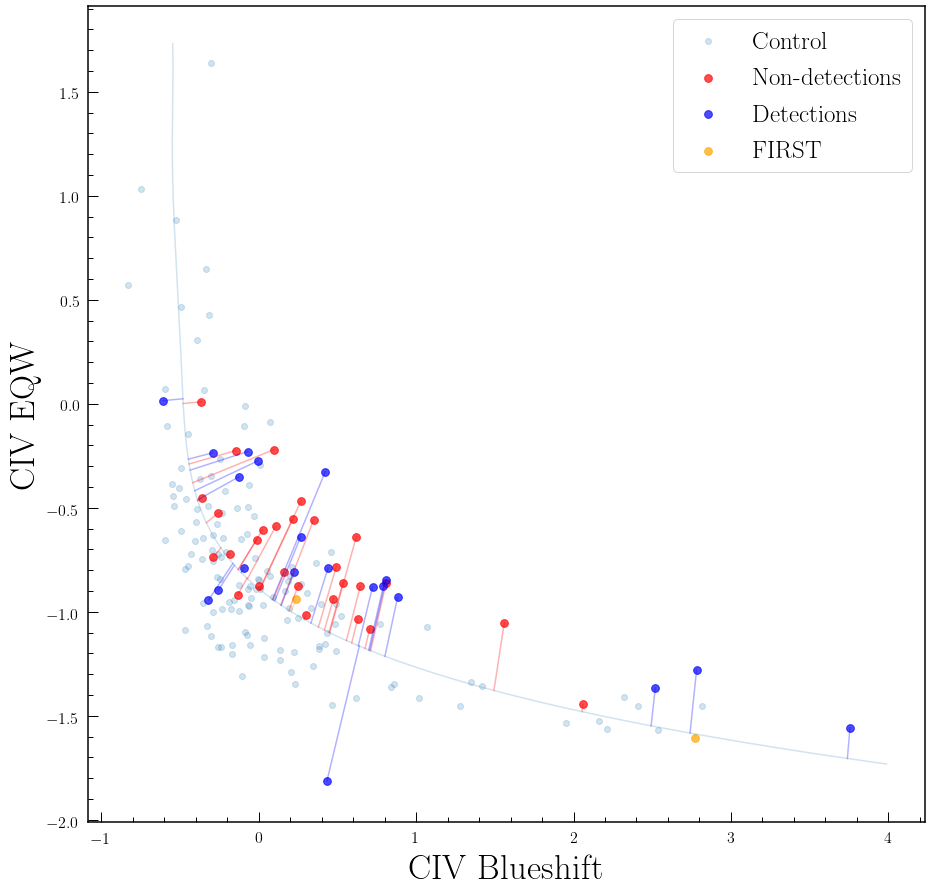

In [6]:
plt.figure(figsize=(15,15))

plt.plot(bestfit[:,0], bestfit[:,1], alpha=0.2)
plt.scatter(control[:,0], control[:,1], alpha=0.2, label="Control")


plt.scatter(vla_civ[:,0][D==0], vla_civ[:,1][D==0], s=60, color="red", alpha=0.7, label="Non-detections")
plt.scatter(vla_civ[:,0][D==1], vla_civ[:,1][D==1], s=60, color="blue", alpha=0.7, label="Detections")
plt.scatter(vla_civ[:,0][D==2], vla_civ[:,1][D==2], s=60, color="orange", alpha=0.7, label="FIRST")


for i in range(len(vla_civ)):
    plt.plot([vla_civ[i,0], vlaXY[i,0]], [vla_civ[i,1], vlaXY[i,1]], color=col[int(D[i])], alpha=0.3)
    


plt.xlabel("CIV Blueshift", fontsize=35)
plt.ylabel("CIV EQW", fontsize=35)
plt.legend(loc="best", prop={'size': 25})
plt.show()

Now want to scale the above points based on average SFR from the Mi+EQW relations from Harris+2016

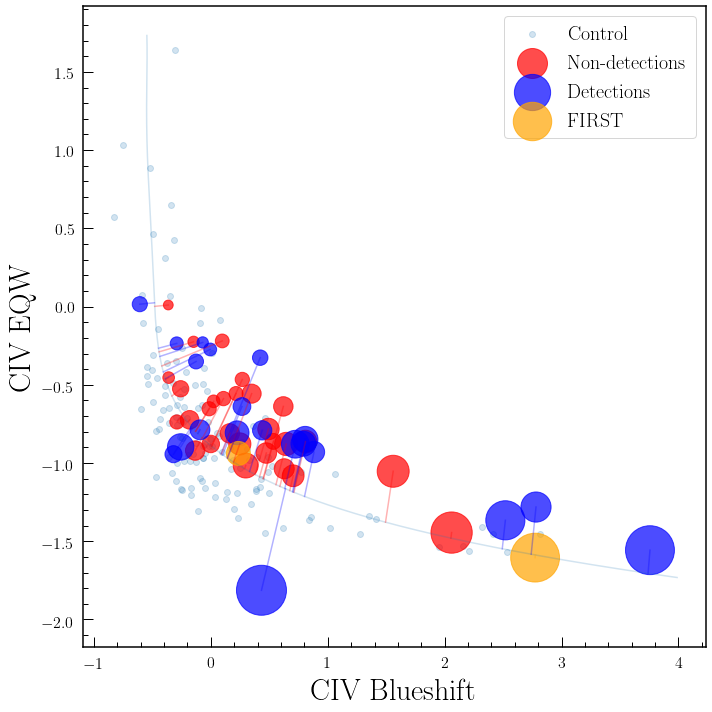

(array([95.90108623]), array([2499.7293587]))

In [7]:
SFR_Mag = SFR_Mi(Miz2)
SFR_eq = SFR_eqw(ew_civ)
avgSFR = (SFR_Mag+SFR_eq)/2

#Scale sizes based on SFR
a = 3900/15 - 1  
b = np.log(a)/200
c = 2500
size_harris = np.array([((c / (1+a*np.e**(-b*x)))) for x in avgSFR]).reshape(len(avgSFR), 1)

plt.figure(figsize=(10,10))

plt.plot(bestfit[:,0], bestfit[:,1], alpha=0.2)
plt.scatter(control[:,0], control[:,1], alpha=0.2, label="Control")


plt.scatter(vla_civ[:,0][D==0], vla_civ[:,1][D==0], s=size_harris[D==0], color="red", alpha=0.7, label="Non-detections")
plt.scatter(vla_civ[:,0][D==1], vla_civ[:,1][D==1], s=size_harris[D==1], color="blue", alpha=0.7, label="Detections")
plt.scatter(vla_civ[:,0][D==2], vla_civ[:,1][D==2], s=size_harris[D==2], color="orange", alpha=0.7, label="FIRST")


for i in range(len(vla_civ)):
    plt.plot([vla_civ[i,0], vlaXY[i,0]], [vla_civ[i,1], vlaXY[i,1]], color=col[int(D[i])], alpha=0.3)
    


plt.xlabel("CIV Blueshift", fontsize=30)
plt.ylabel("CIV EQW", fontsize=30)
plt.legend(loc="best", prop={'size': 20})
plt.tight_layout()
#plt.savefig("PaperPlots/CIVplot_scaled_harrisAvgSFR.pdf")
plt.show()

min(size_harris), max(size_harris)

Now want to do the same scaling, but based on SFR from 1.4 GHz luminosity Yun+01 relation

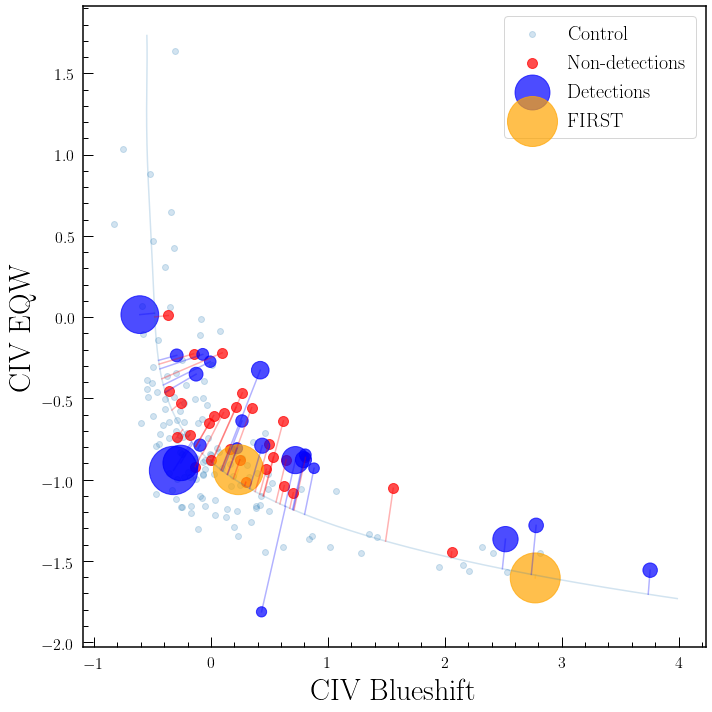

(array([93.83045414]), array([2500.]))

In [8]:
SFRL14 = SFR_L14(L14)

#Scale sizes based on SFR
a = 500/15 - 1  
b = np.log(a)/3960
c = 2500
size_yun = np.array([((c / (1+a*np.e**(-b*x)))) for x in SFRL14]).reshape(len(SFRL14), 1)


plt.figure(figsize=(10,10))

plt.plot(bestfit[:,0], bestfit[:,1], alpha=0.2)
plt.scatter(control[:,0], control[:,1], alpha=0.2, label="Control")


plt.scatter(vla_civ[:,0][D==0], vla_civ[:,1][D==0], s=100, color="red", alpha=0.7, label="Non-detections")
plt.scatter(vla_civ[:,0][D==1], vla_civ[:,1][D==1], s=size_yun[D==1], color="blue", alpha=0.7, label="Detections")
plt.scatter(vla_civ[:,0][D==2], vla_civ[:,1][D==2], s=size_yun[D==2], color="orange", alpha=0.7, label="FIRST")


for i in range(len(vla_civ)):
    plt.plot([vla_civ[i,0], vlaXY[i,0]], [vla_civ[i,1], vlaXY[i,1]], color=col[int(D[i])], alpha=0.3)
    


plt.xlabel("CIV Blueshift", fontsize=30)
plt.ylabel("CIV EQW", fontsize=30)
plt.legend(loc="best", prop={'size': 20})
plt.tight_layout()
#plt.savefig("PaperPlots/CIVplot_scaled_L14SFR.pdf")
plt.show()

min(size_yun), max(size_yun)

Now want to display the ratio of the two sizes, where bigger points indicate the presence of "excess SF"

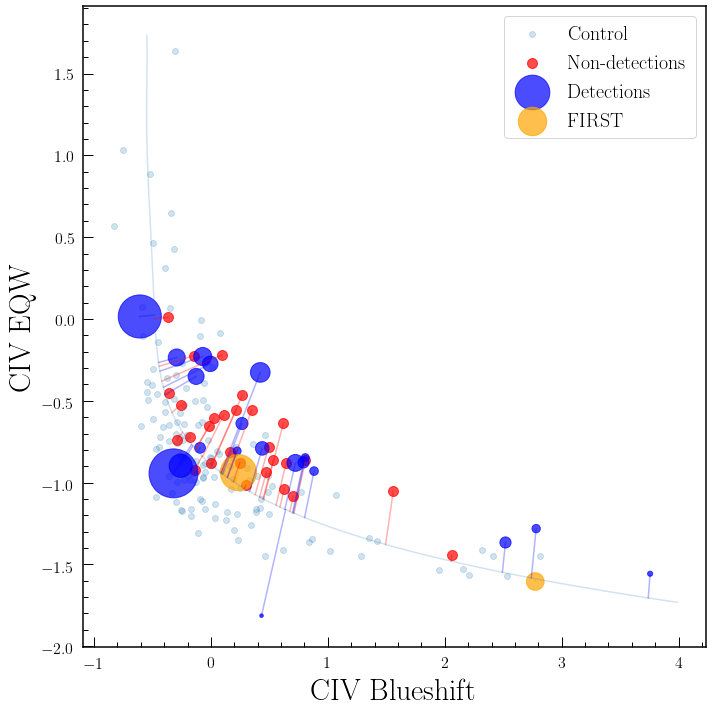

(array([12.63629888]),
 array([7724.03572766]),
 array([[ 0.95439872],
        [ 7.98840405],
        [ 0.28115172],
        [ 0.60650427],
        [ 0.39909319],
        [ 0.1051226 ],
        [ 0.21307557],
        [ 0.64935902],
        [ 0.73391537],
        [ 0.8637861 ],
        [ 0.42029643],
        [ 0.55338697],
        [ 0.26014169],
        [ 1.04861861],
        [ 0.61712552],
        [ 0.31102323],
        [25.74678576],
        [ 1.80220179],
        [ 0.80553107],
        [ 0.23898982],
        [ 0.489065  ],
        [ 0.16447461],
        [ 0.33619582],
        [ 0.23446078],
        [ 0.042121  ],
        [ 0.20626775],
        [ 1.29314158],
        [ 0.38969382],
        [ 6.19788438],
        [ 0.08774714],
        [ 0.203611  ],
        [ 0.25187962],
        [ 0.65400116],
        [ 0.41805418],
        [ 0.56540859],
        [ 0.97235591],
        [ 0.21610737],
        [ 1.09128146],
        [ 0.78448567],
        [ 0.2499569 ],
        [ 0.81019405],
        [

In [9]:
SFRratio = size_yun/size_harris

#Scale sizes based on SFR
a = 320/15 - 1  
b = np.log(a)/5
c = 2500
#size_ratio = np.array([((c / (1+a*np.e**(-b*x)))) for x in SFRratio]).reshape(len(SFRratio), 1)
size_ratio = SFRratio*300

plt.figure(figsize=(10,10))

plt.plot(bestfit[:,0], bestfit[:,1], alpha=0.2)
plt.scatter(control[:,0], control[:,1], alpha=0.2, label="Control")


plt.scatter(vla_civ[:,0][D==0], vla_civ[:,1][D==0], s=100, color="red", alpha=0.7, label="Non-detections")
plt.scatter(vla_civ[:,0][D==1], vla_civ[:,1][D==1], s=size_ratio[D==1], color="blue", alpha=0.7, label="Detections")
plt.scatter(vla_civ[:,0][D==2], vla_civ[:,1][D==2], s=size_ratio[D==2], color="orange", alpha=0.7, label="FIRST")


for i in range(len(vla_civ)):
    plt.plot([vla_civ[i,0], vlaXY[i,0]], [vla_civ[i,1], vlaXY[i,1]], color=col[int(D[i])], alpha=0.3)
    


plt.xlabel("CIV Blueshift", fontsize=30)
plt.ylabel("CIV EQW", fontsize=30)
plt.legend(loc="best", prop={'size': 20})
plt.tight_layout()
#plt.savefig("PaperPlots/CIVplot_scaled_SFRratio.pdf")
plt.show()

min(size_ratio), max(size_ratio), SFRratio

In [10]:
max(avgSFR), max(SFRL14), max(size_ratio)

(528.6370782934971, 762594.901016301, array([7724.03572766]))